# Sistema de recomendaciones LicitaLAB
#### Basado en las descripciones de los usuarios y las categorías en que ofrecen.

Si es primera vez que se lanza este PyNotebook, se generarán un grupo de archivos, necesarios para llevar a cabo las recomendaciones. 

### Imports y configuraciones

In [1]:
import os
from src.utils.RecommenderSystem import RecommenderSystem  
import pandas as pd
from unidecode import unidecode 
from tqdm import tqdm
import torch 
import matplotlib.pyplot as plt
if torch.cuda.is_available(): 
    gpu_device = 0  
    torch.cuda.set_device(gpu_device)
    device = torch.device("cuda")
    print(f"Using GPU: {torch.cuda.get_device_name(gpu_device)}")
else:
    
    device = torch.device("cpu")
    print("No GPU available, using CPU")


c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Using GPU: NVIDIA GeForce RTX 3060


Agregar la ubicación donde se encuentra el .csv con el que se genera el espacio de usuarios.

In [2]:
train_path = 'C:\\Users\\magda\\OneDrive\\Escritorio\\MDS_licitalab\\Data\\marzo.csv'
test_path =  'C:\\Users\\magda\\OneDrive\\Escritorio\\MDS_licitalab\\Data\\abril.csv'

train = pd.read_csv(train_path) 
test = pd.read_csv(test_path)

Carga el Dataset.

In [3]:


train['feature_vector'] = train['agileoffereditemscategoriaofertada'] + ' ' + train['agileoffereditemsdescripcionofertada']
train['feature_vector'] = train['feature_vector'].apply(lambda x: unidecode(str(x)).lower())

test['feature_vector'] = test['agileoffereditemscategoriaofertada'] + ' ' + test['agileoffereditemsdescripcionofertada']
test['feature_vector'] = test['feature_vector'].apply(lambda x: unidecode(str(x)).lower())


<class 'pandas.core.frame.DataFrame'>


C:\Users\magda\AppData\Local\Temp\ipykernel_23488\3472420005.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifying_users.rename(columns={'all users': 'qualifying users'}, inplace=True)


,qualifying users
taxnumberprovider,
77.577.609-9,10
77.539.459-5,10
77.497.601-9,10
77.539.417-K,10
77.512.285-4,10
...,...
77.730.550-6,1610
91.575.000-1,1654
96.556.940-5,2114


,taxnumberprovider,qualifying users
0,77.577.609-9,10
1,77.539.459-5,10
2,77.497.601-9,10
3,77.539.417-K,10
4,77.512.285-4,10
...,...,...
1841,77.730.550-6,1610
1842,91.575.000-1,1654
1843,96.556.940-5,2114
1844,77.765.630-9,2558


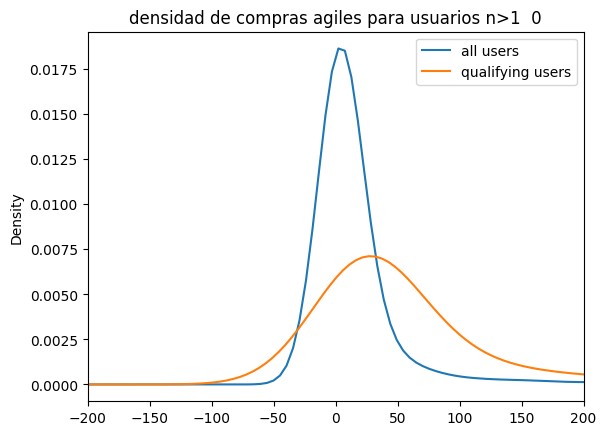

In [4]:
gb = train.groupby(by =['taxnumberprovider']).agg({'agilebuyingscode':'nunique'})
gb = gb.sort_values(by = 'agilebuyingscode')
gb.rename(columns={'agilebuyingscode': 'all users'}, inplace=True)

fig,ax = plt.subplots()
gb.plot.density(title = "densidad de compras agiles para todos los usuarios", ax = ax)
  
n_strings = 10
qualifying_users =  gb[gb['all users'] >= n_strings]
qualifying_users.rename(columns={'all users': 'qualifying users'}, inplace=True)

qualifying_users.plot.density(title = 'densidad de compras agiles para usuarios n>1  0',ax = ax, legend = True)
ax.set_xlim(-200, 200)

print(type(qualifying_users))
display(qualifying_users)
df = qualifying_users.reset_index()
display(df)

C:\Users\magda\AppData\Local\Temp\ipykernel_23488\4117253357.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifying_users.rename(columns={'all users': 'qualifying users'}, inplace=True)


(-200.0, 200.0)

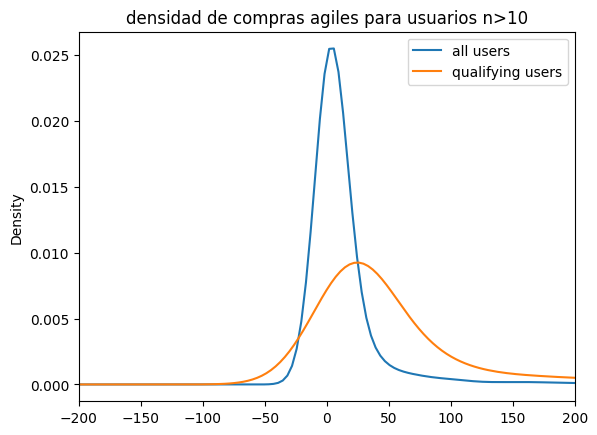

In [5]:
gb = test.groupby(by =['taxnumberprovider']).agg({'agilebuyingscode':'nunique'})
gb = gb.sort_values(by = 'agilebuyingscode')
gb.rename(columns={'agilebuyingscode': 'all users'}, inplace=True)

fig,ax = plt.subplots()
gb.plot.density(title = "densidad de compras agiles para todos los usuarios", ax = ax)
  
n_strings = 10
qualifying_users =  gb[gb['all users'] >= n_strings]
qualifying_users.rename(columns={'all users': 'qualifying users'}, inplace=True)

qualifying_users.plot.density(title = 'densidad de compras agiles para usuarios n>10',ax = ax, legend = True)
ax.set_xlim(-200, 200)

Lanzar el recomendador. Si no encuentra los archivos necesarios iniciará un proceso de generación de estos. Se demora bastante, pero no deberían haber problemas.

In [6]:
RS = RecommenderSystem(train,
                       test,
                       save_path = os.getcwd())

Initializing Recommender System
The current directory is c:\Users\magda\OneDrive\Escritorio\MDS_licitalab
Using GPU: NVIDIA GeForce RTX 3060
Initializing User Space
Directory 'c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\userspace_data' created or already exists.
['BERT_model.pkl', 'BERT_tokenizer.pkl', 'clustering_model.pkl', 'clusters.csv', 'corpus.csv', 'vectorized_corpus.csv']
All necesary files have been found.
Loaded cluster model
Loaded BERT_model
Loaded tokenizer
Loaded vectorized data
Loaded kmeans data
Se han removido 72.83% de taxnumberproviders, por tener < 10 licitaciones. 
 El numero de usuarios para crear el corpus será 1846.
Loaded corpus data
Se han removido 72.83% de taxnumberproviders, por tener < 10 licitaciones. 
 El numero de usuarios para crear el corpus será 1846.
Se han removido 75.15% de taxnumberproviders, por tener < 10 licitaciones. 
 El numero de usuarios para crear el corpus será 1378.


### Predecir recomendaciones

Se le entrega el string del rut al sistema recomendador a traves de la función `predict()`. El sistema retorna el número de cluster al que el usuario ha sido asignado y un dataframe con las compras ágiles recomendadas. 

In [7]:
ruts = test['taxnumberprovider'].sample(n =1) 
n_cluster,gg = RS.predict(ruts.values[0])

(76.166.291-0) data point belongs to cluster 26


### Métricas

In [8]:
RS.evaluate_users()

Processing RUTs:   5%|▌         | 67/1240 [00:16<04:46,  4.09it/s]


KeyboardInterrupt: 

In [ ]:
display(RS.a)
display(RS.b)
display(RS.c)
display(RS.d)

In [9]:
RS.scores(train,test)

c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\src\utils\RecommenderSystem.py:262: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'xx'] = df['agileitemsmp_id'].str.slice(0, 2)
c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\src\utils\RecommenderSystem.py:263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'xxyy'] = df['agileitemsmp_id'].str.slice(0,4)
c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\src\utils\RecommenderSystem.py:262: SettingWithCopyWarning: 
A value is trying to be set

Media de la columna: 0.08313648028633905
Desviación estándar de la columna: 0.10475261852305853
Media de la columna: 0.08313648028633905
Desviación estándar de la columna: 0.10475261852305853
Se eliminaron 695 columnas en DataFrame 1
Se eliminaron 98 columnas en DataFrame 2



153/153 [==============================] - 0s 896us/step
Época 1/30 - Pérdida en entrenamiento: 29.9077, Pérdida en prueba: 40.2208, MAE: 4.3001
153/153 [==============================] - 0s 898us/step
Época 2/30 - Pérdida en entrenamiento: 19.2229, Pérdida en prueba: 43.3789, MAE: 4.4478
153/153 [==============================] - 0s 829us/step
Época 3/30 - Pérdida en entrenamiento: 14.8615, Pérdida en prueba: 39.8116, MAE: 4.0983
153/153 [==============================] - 0s 963us/step
Época 4/30 - Pérdida en entrenamiento: 11.7178, Pérdida en prueba: 41.5441, MAE: 4.1316
153/153 [==============================] - 0s 834us/step
Época 5/30 - Pérdida en entrenamiento: 9.7500, Pérdida en prueba: 41.8725, MAE: 4.048

,score,rut,xx,xxyy
0,5.197897,10.232.710-1,42,4713
1,4.815719,10.232.710-1,43,4713
2,3.801906,10.232.710-1,44,4713
3,3.791493,10.232.710-1,47,4713
4,10.312824,10.232.710-1,50,4713
...,...,...,...,...
4871,8.289642,99.593.170-2,42,4214
4872,8.101736,99.593.170-2,42,4218
4873,8.214381,99.593.170-2,42,4222
4874,7.488616,99.593.170-2,42,4227
